## Ames Housing Data and Kaggle Challenge
> ### Modeling and Tuning
>> Gabriel Perez Prieto

#### Importing Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [43]:
# plot style to be used
plt.style.use('seaborn-whitegrid')

In [44]:
# setting max columns limit
pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

In [45]:
# reading in clean data with added features
df = pd.read_csv('../datasets/train_clean.csv')

In [46]:
df.head()

,id,pid,ms_subclass,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,saleprice,garage_area * garage_cars,totrms_abvgrd * gr_liv_area,1st_flr_sf * total_bsmt_sf,garage_yr_blt * year_built,total_area,overall_qual * gr_liv_area,exter_qual * gr_liv_area,gr_liv_area * kitchen_qual,bsmt_qual * gr_liv_area,overall_qual * 1st_flr_sf,overall_qual * kitchen_qual,overall_qual * exter_qual,overall_qual^2,overall_qual * total_bsmt_sf,overall_qual * garage_area,overall_qual * garage_cars,total_bsmt_sf * gr_liv_area,overall_qual * bsmt_qual,overall_qual * year_built,overall_qual * garage_yr_blt,overall_qual * totrms_abvgrd,gr_liv_area * garage_area,overall_qual * year_remod/add,gr_liv_area * garage_cars,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,60,68.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,1Fam,2Story,6,8,1976,2005,Gable,CompShg,3,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,1,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,0,5,1976.0,2,2.0,475.0,3,3,Y,0,44,0,0,0,0,0,0,0,0,3,2010,130500,950.0,8874,525625.0,3904576.0,4158.0,8874,5916,5916,4437,4350,24,24,36,4350.0,2850.0,12.0,1072275.0,18,11856,11856.0,36,702525.0,12030,2958.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,1Fam,2Story,7,5,1996,1997,Gable,CompShg,3,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,1,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,3,5,1997.0,2,2.0,559.0,3,3,Y,0,74,0,0,0,0,0,0,0,0,4,2009,220000,1118.0,16976,833569.0,3986012.0,5716.0,14854,8488,8488,8488,6391,28,28,49,6391.0

In [47]:
features = ['overall_qual',
 'exter_qual',
 'gr_liv_area',
 'kitchen_qual',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'bsmt_qual',
 'year_built',
 'garage_finish',
 'year_remod/add',
 'fireplace_qu',
 'full_bath',
 'garage_yr_blt',
 'totrms_abvgrd',
 'mas_vnr_area',
 'garage_area * garage_cars',
 'totrms_abvgrd * gr_liv_area',
 '1st_flr_sf * total_bsmt_sf',
 'garage_yr_blt * year_built',
 'total_area',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_GrnHill',
 'neighborhood_IDOTRR',
 'neighborhood_Landmrk',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker']

In [48]:
# defining variables
X = df[features]
y = df['saleprice']

# Model Prep: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# transforming y to y_log - normalizing distribution
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

In [49]:
# null model
y_train.mean()

181423.31506849316

In [50]:
# Model Prep: Sacaling
# scaling -> (x - x_mean) / x_std
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

# instantiante model
lr = LinearRegression()

# cross_val_score
cross_val_score(lr, X_train, y_train_log, cv=5).mean()

# fit model
lr.fit(X_train_sc, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Coeficients and Intercept

In [51]:
# model coeficients - first five
lr.coef_[:5]

array([ 0.10914096,  0.01201746,  0.04930726,  0.02860974, -0.00431629])

In [52]:
# model intercept
lr.intercept_

12.024420055880679

#### Scores for Train ad Test Data

In [53]:
# train score
print(f'Train Score: {lr.score(X_train_sc, y_train_log)}')

# test score
print(f'Test Score: {lr.score(X_test_sc, y_test_log)}')

Train Score: 0.8786865679821513
Test Score: 0.8954393003374376


#### Ridge Regularization

In [54]:
# set up a list of alphas
r_alphas = np.logspace(-3, 3, 7)

# cross validate with list o alphas
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# fit model using best alpha
ridge_cv.fit(X_train_sc, y_train_log)

#print best alpha
print(f' Ridge\'s Best Alpha: {ridge_cv.alpha_}')

# train score
print(f' Ridge Train Score: {ridge_cv.score(X_train_sc, y_train_log)}')
             
# test score               
print(f' Ridge Test Score: {ridge_cv.score(X_test_sc, y_test_log)}')

 Ridge's Best Alpha: 0.001
 Ridge Train Score: 0.8786831168495023
 Ridge Test Score: 0.8955060657538414


#### Lasso Regularization

In [55]:
# set up a list of alphas
l_alphas = np.logspace(-3, 3, 7)

# cross validate with list o alphas
lasso_cv = LassoCV(alphas=l_alphas,  cv=5, max_iter=5000)

# fit model using best alpha
lasso_cv.fit(X_train_sc, y_train_log)

#print best alpha
print(f' Lasso\'s Best Alpha: {lasso_cv.alpha_}')

# train score
print(f' Lasso Train Score: {lasso_cv.score(X_train_sc, y_train_log)}')
             
# test score               
print(f' Lasso Test Score: {lasso_cv.score(X_test_sc, y_test_log)}')

 Lasso's Best Alpha: 0.001
 Lasso Train Score: 0.8757083790193534
 Lasso Test Score: 0.8944854405896108


In [56]:
# creating a DataFrame with lasso coefficients
coef_lasso = pd.DataFrame(lasso_cv.coef_, index=X_train.columns, columns=['Coefficients'])
coef_lasso.sort_values(by='Coefficients', ascending=False)

,Coefficients
total_area,0.186215
overall_qual,0.109603
year_remod/add,0.037187
year_built,0.029980
kitchen_qual,0.027565
bsmt_qual,0.023126
fireplace_qu,0.021176
neighborhood_Crawfor,0.019060
neighborhood_ClearCr,0.013201
neighborhood_GrnHill,0.012854


#### Predictions Using Ridge Regularization

In [57]:
# creating predictions
preds_train = ridge_cv.predict(X_train_sc)

In [58]:
# calculating residuals for train
residuals = preds_train - y_train_log

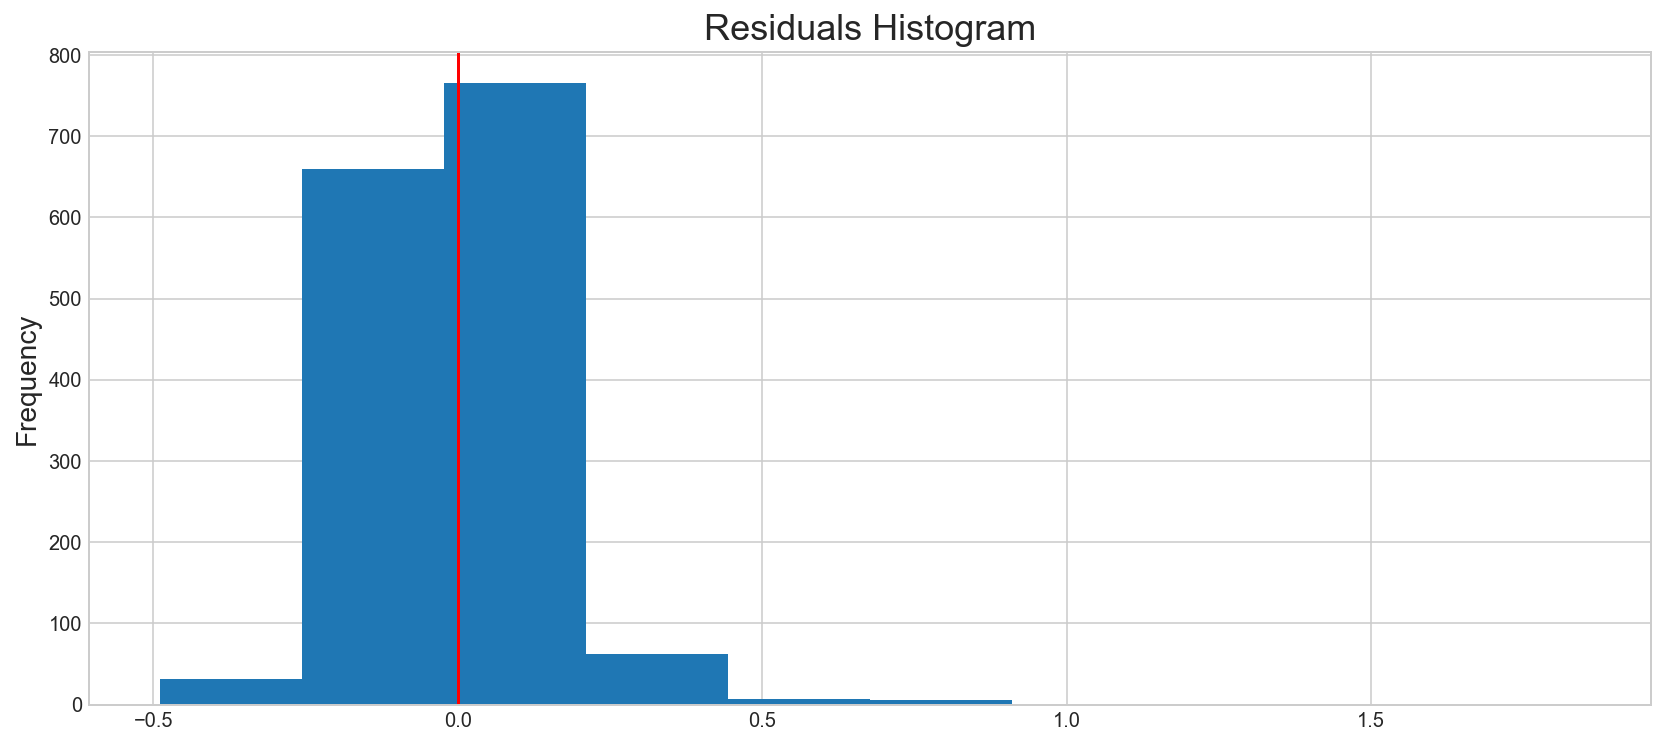

In [59]:
# plotting residuals histogram
plt.figure(figsize=(14,6))
residuals.hist()
plt.title('Residuals Histogram', size=18)
plt.ylabel('Frequency', size=14)
plt.axvline(0, color='r');

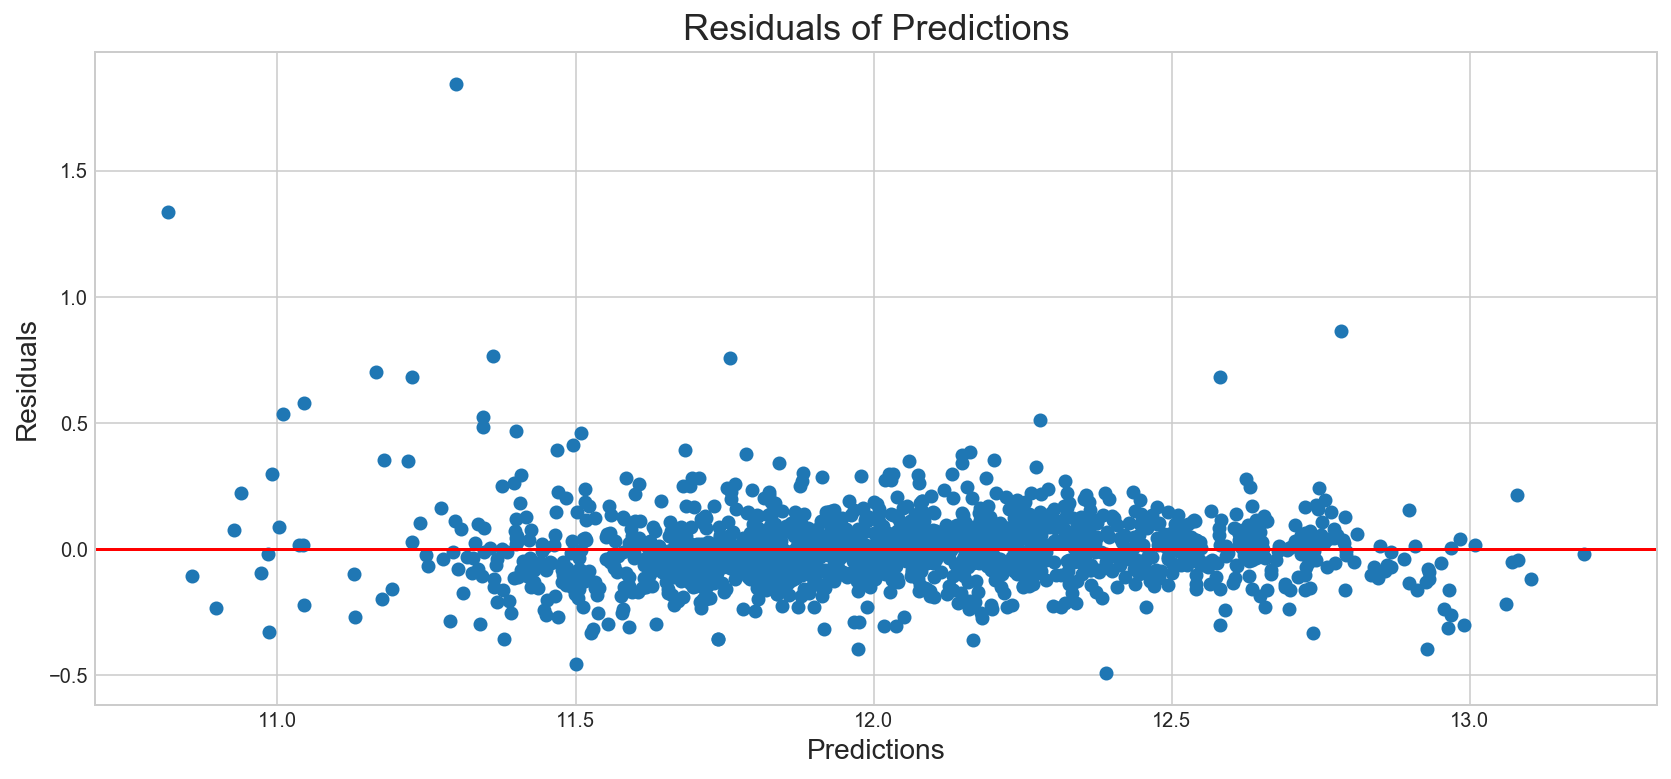

In [60]:
# plotting scatter for predictions and residuals
plt.figure(figsize=(14,6))
plt.scatter(preds_train, residuals)
plt.axhline(color='r')
plt.title('Residuals of Predictions', size=18)
plt.xlabel('Predictions', size=14)
plt.ylabel('Residuals', size=14);

In [61]:
# converting predictions back from logarithmic
preds_train_inverse = np.exp(preds_train)
# printing first five values of array
preds_train_inverse[:5]

array([134640.36179428, 193631.55941265, 305735.5066954 , 305685.68804108,
       192448.36704288])

In [62]:
#SSE - Sum Squared Error - by Hand
np.sum(residuals ** 2)

31.62621948908066

In [63]:
#RMSE - Root Mean Squared Error - by Hand
np.sqrt(np.mean((residuals ** 2)))

0.14363244815319148

#### Predictions with Test Data ( X_test )

In [64]:
# creating a new DataFrame for predictions
predictions = pd.DataFrame(np.exp(ridge_cv.predict(X_test_sc)), columns = ['test_preds'])
# adding y_test columns
predictions['y_test'] = y_test.values
# adding errors columns
predictions['test_errors'] = predictions['test_preds'] - predictions['y_test']
# printing first five rows
predictions.head()

,test_preds,y_test,test_errors
0,119964.689580,120000,-35.310420
1,100236.187949,116000,-15763.812051
2,282645.002986,269500,13145.002986
3,353646.183204,441929,-88282.816796
4,324756.829412,402000,-77243.170588


### Predictions on Kaggle Test Data

In [70]:
# reading test_clean dataset into memmory
df = pd.read_csv('../datasets/test_clean.csv')

#### Scaling Kaggle Test Data

In [71]:
# scaling -> (x - x_mean) / x_std
X_test_kaggle_sc = ss.transform(df[features])

In [72]:
# creating a new DataFrame for predictions
predictions_kaggle = pd.DataFrame(np.exp(ridge_cv.predict(X_test_kaggle_sc)), columns = ['test_preds'])

# adding predictions to the original dataframe
df['test_preds'] = predictions_kaggle

In [73]:
# creating submission dataframe for Kaggle
submission_kaggle = df[['id', 'test_preds']]
# renaming columns to match Kaggle format
submission_kaggle.rename(columns={'id': 'Id', 'test_preds': 'SalePrice'}, inplace=True)
# print first five rows
submission_kaggle.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Id,SalePrice
0,2658,122996.038493
1,2718,199977.294782
2,2414,188441.293231
3,1989,115496.925532
4,625,177150.359811


In [ ]:
# save Kaggle dataframe for submission
submission_kaggle.to_csv('../project_2/submissions/submission_9test.csv', index=False)